In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DBConnection import DBConnection 
%matplotlib inline

# Collecting the data from database

In [2]:
db = DBConnection()
conn = db.get_connector()
cur = conn.cursor()

In [3]:
cur.execute("SELECT * FROM ARTISTS")
artist_colnames = [desc[0] for desc in cur.description]
res = cur.fetchall()

artist_df = pd.DataFrame(res, columns=artist_colnames)

In [4]:
genre_dict={'Portishead': 'Trip-Hop', 
            'Pink Floyd': 'Rock',
            'Radiohead': 'Rock',
            'Massive Attack': 'Trip-Hop',
            'Tricky': 'Trip-Hop',
            'trentemøller':'Electronic',
            'Motörhead': 'Metal',
            'TOOL': 'Rock',
            'Björk':'Pop',
            'Hooverphonic':'Trip-Hop',
            'Moloko':'Electronic',
            'Morphine': 'Rock',
            'Faithless': 'Electronic',
            'Archive': 'Trip-Hop',
            'Groove Armada':'Electronic',
            'Testament':'Metal',
            'Incubus':'Rock',
            'Jimi Hendrix': 'Rock',
            'Queens of the Stone Age':'Rock',
            'Alice In Chains': 'Rock',
            'Pearl Jam': 'Rock',
            'Nine Inch Nails': 'Rock',
            'Placebo': 'Rock',
            'David Bowie': 'Rock',
            'Black Sabbath': 'Metal',
            'A Perfect Circle': 'Rock'}

In [5]:
artist_df['genre'] = artist_df['artist_name'].map(genre_dict)

In [6]:
artist_df.head()

,artist_id,artist_name,genre
0,6liAMWkVf5LH7YR9yfFy1Y,Portishead,Trip-Hop
1,0k17h0D3J5VfsdmQ1iZtE9,Pink Floyd,Rock
2,4Z8W4fKeB5YxbusRsdQVPb,Radiohead,Rock
3,6FXMGgJwohJLUSr5nVlf9X,Massive Attack,Trip-Hop
4,6hhA8TKRNryM8FNzqCqdDO,Tricky,Trip-Hop


<AxesSubplot:>

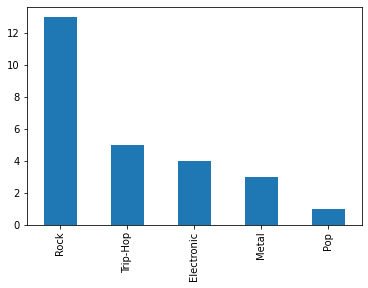

In [7]:
artist_df['genre'].value_counts().plot(kind='bar')

In [8]:
cur.execute("SELECT * FROM tracks t \
            JOIN albums a on t.album_id = a.album_id")
# Collecting column names from database
colnames = [desc[0] for desc in cur.description]

# Creating Dataframe
res = cur.fetchall()
dataframe = pd.DataFrame(res, columns = colnames)
dataframe = dataframe.merge(artist_df, on=['artist_id'], how='left')
dataframe = dataframe.loc[:,~dataframe.columns.duplicated()]
dataframe = dataframe.dropna(subset=['genre'], how='all')

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5617 entries, 0 to 5868
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5617 non-null   object
 1   name              5617 non-null   object
 2   track_number      5617 non-null   int64 
 3   uri               5617 non-null   object
 4   album_id          5617 non-null   object
 5   artist_id         5617 non-null   object
 6   danceability      5617 non-null   object
 7   energy            5617 non-null   object
 8   key               5617 non-null   int64 
 9   loudness          5617 non-null   object
 10  mode              5617 non-null   int64 
 11  speechiness       5617 non-null   object
 12  acousticness      5617 non-null   object
 13  instrumentalness  5617 non-null   object
 14  liveness          5617 non-null   object
 15  valence           5617 non-null   object
 16  tempo             5617 non-null   object
 17  album_name    

In [10]:
dataframe.columns

Index(['id', 'name', 'track_number', 'uri', 'album_id', 'artist_id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'album_name', 'album_type', 'release_date', 'total_tracks', 'type',
       'artist_name', 'genre'],
      dtype='object')

In [11]:
feature_list = ['danceability', 'energy', 'loudness', 'key', 'mode','speechiness','acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo']

for i in feature_list:
    dataframe[i] = dataframe[i].astype(float)

In [12]:
dataframe.groupby('genre')[feature_list].mean()

,danceability,energy,loudness,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
genre,,,,,,,,,,,
Electronic,0.673276,0.699962,-9.132606,5.515152,0.497608,0.068962,0.124923,0.366046,0.242492,0.498597,123.234900
Metal,0.316573,0.906420,-7.316448,5.224442,0.668625,0.097272,0.049922,0.238566,0.421805,0.274116,124.945088
Pop,0.384032,0.424598,-12.016723,5.233696,0.440217,0.081128,0.521580,0.102841,0.251199,0.216577,114.934957
Rock,0.437283,0.657235,-9.811424,5.362652,0.687415,0.074391,0.216257,0.231603,0.357186,0.384561,122.981575
Trip-Hop,0.532077,0.545559,-10.235027,5.374374,0.501502,0.061723,0.279491,0.297464,0.209741,0.330760,122.105782


# Feature Engineering

Mood: Danceability, Valence, Energy, Tempo

Properties: Loudness, Speechiness, Instrumentalness

Context: Liveness, Acousticness

In [13]:
df = dataframe.drop(['total_tracks', 'album_name', 'album_type', 'type', 'uri', 'track_number','release_date', 'artist_id','album_id','key','mode'], axis = 1)
df

,id,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name,genre
0,3KzBEj5pHEuyWXJEPvxE4g,Silence,0.527,0.823,-7.451,0.0728,0.1880,0.115000,0.2530,0.1230,127.806,Portishead,Trip-Hop
1,5Pd4E39NFVp4GXzMB4yNU2,Hunter,0.529,0.415,-9.634,0.0370,0.8820,0.068600,0.0879,0.1470,134.235,Portishead,Trip-Hop
2,1XiVySbnoOQaMoppyPdaUc,Nylon Smile,0.681,0.668,-9.998,0.0898,0.8670,0.382000,0.1430,0.3700,127.970,Portishead,Trip-Hop
3,4kOy7M6eT5kYJCZxh0c6Lh,The Rip,0.418,0.486,-9.421,0.0318,0.9290,0.461000,0.0988,0.2490,74.924,Portishead,Trip-Hop
4,1aoeuWWsdUU8PAOsh6GCyL,Plastic,0.486,0.557,-8.190,0.0849,0.7260,0.041200,0.0884,0.0752,79.964,Portishead,Trip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,316nCXXZsSSc5fGk1bsS1x,Without You - 2018 Remaster,0.746,0.653,-8.903,0.0291,0.1150,0.028500,0.2880,0.8860,119.160,David Bowie,Rock
5865,04pkbLDMnaQdx4kV9bbuV4,Ricochet - 2018 Remaster,0.664,0.854,-7.349,0.0376,0.1410,0.000000,0.0717,0.7380,101.873,David Bowie,Rock
5866,3pMVWZyHRN3DlQ7k79pmTA,Criminal World - 2018 Remaster,0.551,0.754,-7.522,0.0309,0.0665,0.125000,0.0589,0.9620,129.758,David Bowie,Rock
5867,25ceFvWSaI3zoy9hhNYDqu,Cat People (Putting Out Fire) - 2018 Remaster,0.502,0.867,-5.631,0.0501,0.0630,0.000395,0.0918,0.7520,128.295,David Bowie,Rock


In [14]:
df['artist_label'] = np.where(df['artist_name']=='Portishead', 1, 0)

In [15]:
df['tempo'] = df['tempo'] / 100
df['loudness'] = df['loudness'] / 10

In [16]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm
import seaborn as sns

In [17]:
mms = MinMaxScaler()
df.iloc[:,2:9] = mms.fit_transform(df.iloc[:,2:9])
df

,id,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name,genre,artist_label
0,3KzBEj5pHEuyWXJEPvxE4g,Silence,0.550679,0.822996,0.829582,0.075754,0.188754,0.115115,0.253507,0.1230,1.27806,Portishead,Trip-Hop,1
1,5Pd4E39NFVp4GXzMB4yNU2,Hunter,0.552769,0.414988,0.767785,0.038502,0.885542,0.068669,0.088076,0.1470,1.34235,Portishead,Trip-Hop,1
2,1XiVySbnoOQaMoppyPdaUc,Nylon Smile,0.711599,0.667993,0.757481,0.093444,0.870482,0.382382,0.143287,0.3700,1.27970,Portishead,Trip-Hop,1
3,4kOy7M6eT5kYJCZxh0c6Lh,The Rip,0.436782,0.485990,0.773815,0.033091,0.932731,0.461461,0.098998,0.2490,0.74924,Portishead,Trip-Hop,1
4,1aoeuWWsdUU8PAOsh6GCyL,Plastic,0.507837,0.556991,0.808662,0.088345,0.728915,0.041241,0.088577,0.0752,0.79964,Portishead,Trip-Hop,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,316nCXXZsSSc5fGk1bsS1x,Without You - 2018 Remaster,0.779519,0.652993,0.788478,0.030281,0.115461,0.028529,0.288577,0.8860,1.19160,David Bowie,Rock,0
5865,04pkbLDMnaQdx4kV9bbuV4,Ricochet - 2018 Remaster,0.693835,0.853997,0.832470,0.039126,0.141565,0.000000,0.071844,0.7380,1.01873,David Bowie,Rock,0
5866,3pMVWZyHRN3DlQ7k79pmTA,Criminal World - 2018 Remaster,0.575758,0.753995,0.827573,0.032154,0.066766,0.125125,0.059018,0.9620,1.29758,David Bowie,Rock,0
5867,25ceFvWSaI3zoy9hhNYDqu,Cat People (Putting Out Fire) - 2018 Remaster,0.524556,0.866997,0.881104,0.052133,0.063252,0.000395,0.091984,0.7520,1.28295,David Bowie,Rock,0


In [18]:
pca_mood = PCA(1)
df['mood'] = pca_mood.fit_transform(df.loc[:,['danceability','energy','valence','tempo']])

In [19]:
pca_propert = PCA(1)
df['prop'] = pca_propert.fit_transform(df.loc[:,['loudness', 'speechiness', 'instrumentalness']])

In [20]:
pca_con = PCA(1)
df['context'] = pca_con.fit_transform(df.loc[:,['liveness', 'acousticness']])

In [21]:
df.info()#.groupby(['genre','artist_name']).mean().plot(figsize = (15,12))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5617 entries, 0 to 5868
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5617 non-null   object 
 1   name              5617 non-null   object 
 2   danceability      5617 non-null   float64
 3   energy            5617 non-null   float64
 4   loudness          5617 non-null   float64
 5   speechiness       5617 non-null   float64
 6   acousticness      5617 non-null   float64
 7   instrumentalness  5617 non-null   float64
 8   liveness          5617 non-null   float64
 9   valence           5617 non-null   float64
 10  tempo             5617 non-null   float64
 11  artist_name       5617 non-null   object 
 12  genre             5617 non-null   object 
 13  artist_label      5617 non-null   int32  
 14  mood              5617 non-null   float64
 15  prop              5617 non-null   float64
 16  context           5617 non-null   float64


In [22]:
sample_df = pd.DataFrame()

for i in df['genre'].unique():
    sample_df = pd.concat([sample_df,df[df['genre']==i][['artist_label','id','name','artist_name','genre','mood', 'prop', 'context']].sample(100)])

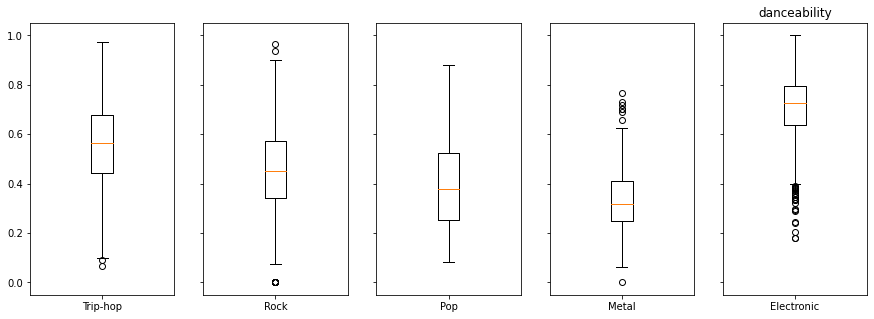

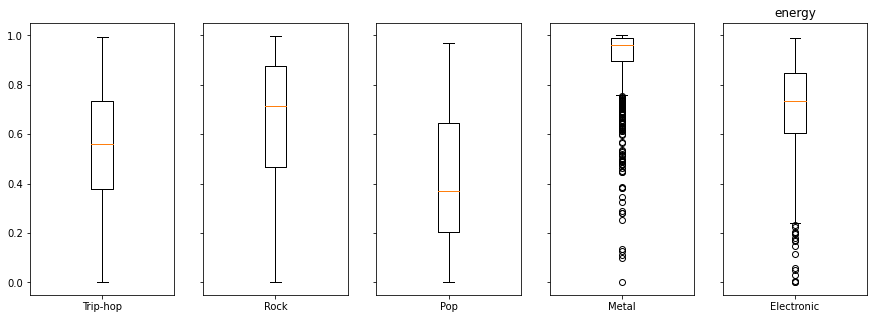

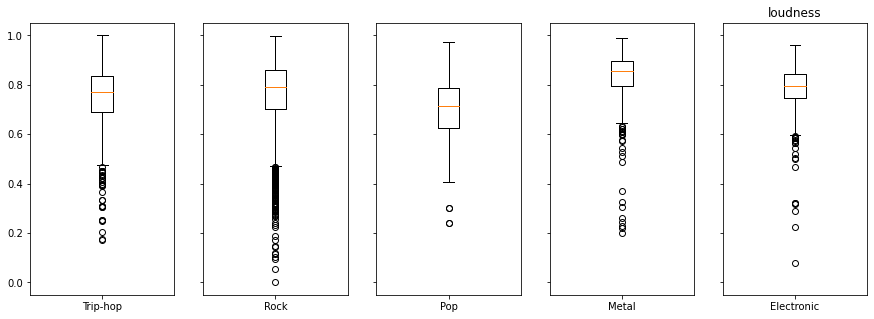

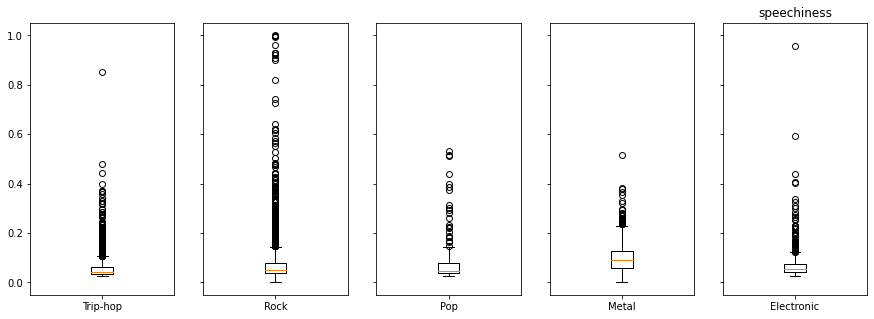

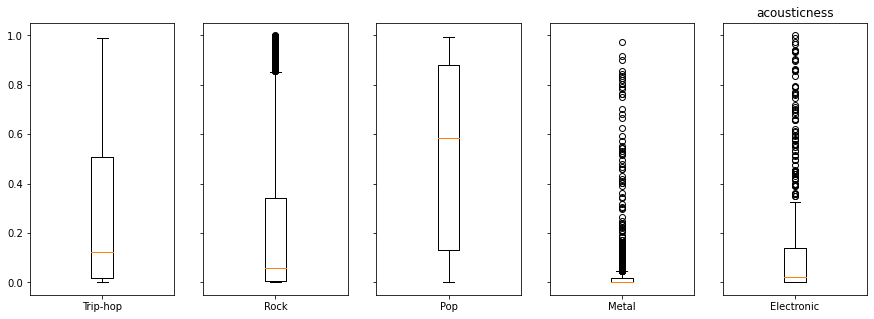

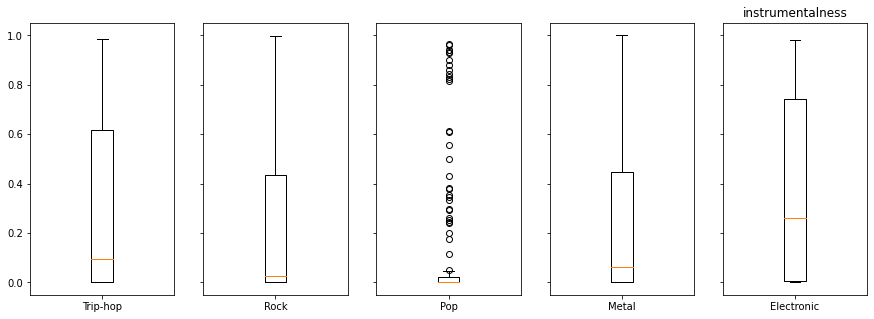

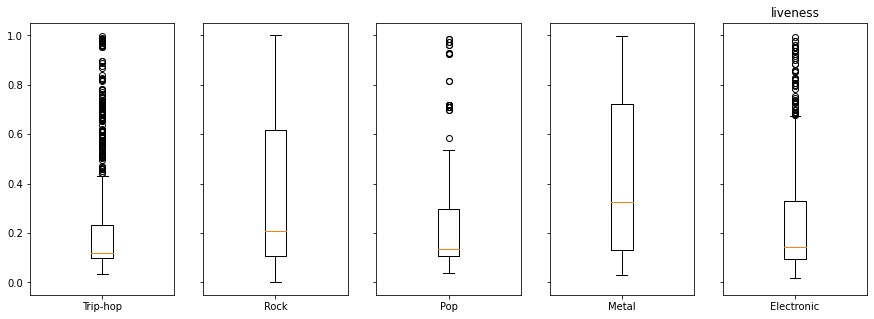

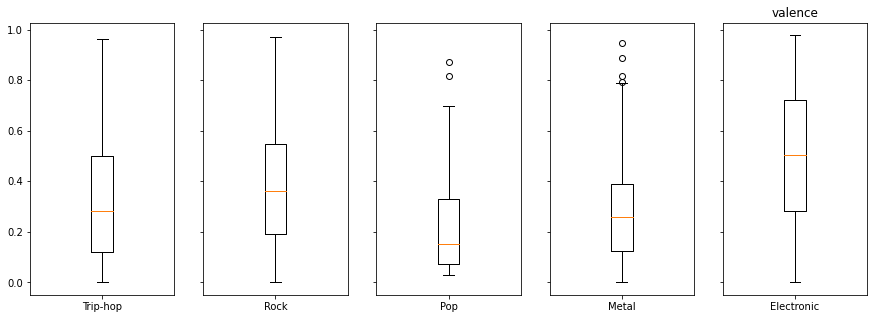

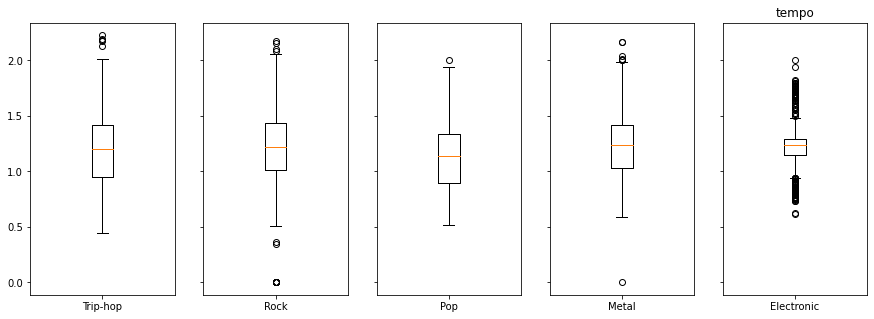

In [23]:
labels=['Trip-hop', 'Rock', 'Pop', 'Metal', 'Electronic']
features = ['danceability','energy', 'loudness', 'speechiness', 'acousticness' ,'instrumentalness', 'liveness','valence', 'tempo']

for i in features:
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), sharey=True)
    plt.title(i)
    ax[0].boxplot(df[df['genre']=='Trip-Hop'][i], labels=['Trip-hop'])
    ax[1].boxplot(df[df['genre']=='Rock'][i], labels=['Rock'])
    ax[2].boxplot(df[df['genre']=='Pop'][i], labels=['Pop'])
    ax[3].boxplot(df[df['genre']=='Metal'][i], labels=['Metal'])
    ax[4].boxplot(df[df['genre']=='Electronic'][i], labels=['Electronic'])

{'whiskers': [<matplotlib.lines.Line2D at 0x299984b0b20>,
 'caps': [<matplotlib.lines.Line2D at 0x299984bb280>,
 'boxes': [<matplotlib.lines.Line2D at 0x299984b0790>],
 'medians': [<matplotlib.lines.Line2D at 0x299984bb9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x299984bbd30>],
 'means': []}

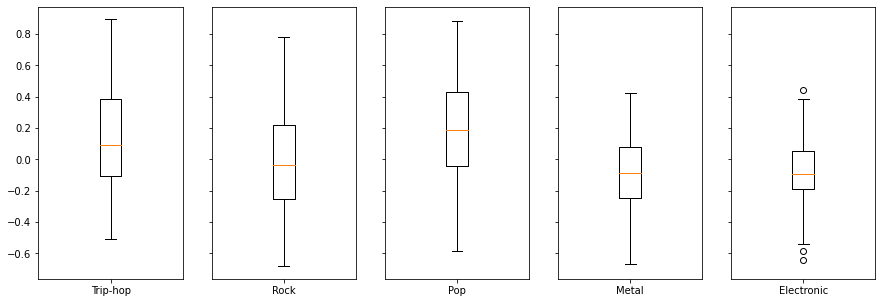

In [24]:
labels=['Trip-hop', 'Rock', 'Pop', 'Metal', 'Electronic']
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), sharey=True)
ax[0].boxplot(sample_df[sample_df['genre']=='Trip-Hop']['mood'], labels=['Trip-hop'])
ax[1].boxplot(sample_df[sample_df['genre']=='Rock']['mood'], labels=['Rock'])
ax[2].boxplot(sample_df[sample_df['genre']=='Pop']['mood'], labels=['Pop'])
ax[3].boxplot(sample_df[sample_df['genre']=='Metal']['mood'], labels=['Metal'])
ax[4].boxplot(sample_df[sample_df['genre']=='Electronic']['mood'], labels=['Electronic'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29998b03430>,
 'caps': [<matplotlib.lines.Line2D at 0x29998b03b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x29998b030a0>],
 'medians': [<matplotlib.lines.Line2D at 0x29998b122b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29998b12640>],
 'means': []}

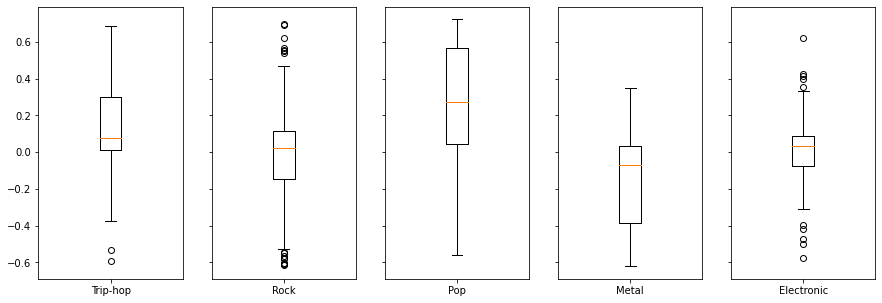

In [25]:
labels=['Trip-hop', 'Rock', 'Pop', 'Metal', 'Electronic']
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), sharey=True)
ax[0].boxplot(sample_df[sample_df['genre']=='Trip-Hop']['context'], labels=['Trip-hop'])
ax[1].boxplot(sample_df[sample_df['genre']=='Rock']['context'], labels=['Rock'])
ax[2].boxplot(sample_df[sample_df['genre']=='Pop']['context'], labels=['Pop'])
ax[3].boxplot(sample_df[sample_df['genre']=='Metal']['context'], labels=['Metal'])
ax[4].boxplot(sample_df[sample_df['genre']=='Electronic']['context'], labels=['Electronic'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29998231f70>,
 'caps': [<matplotlib.lines.Line2D at 0x29998231640>,
 'boxes': [<matplotlib.lines.Line2D at 0x299982319d0>],
 'medians': [<matplotlib.lines.Line2D at 0x29998116340>],
 'fliers': [<matplotlib.lines.Line2D at 0x29998116220>],
 'means': []}

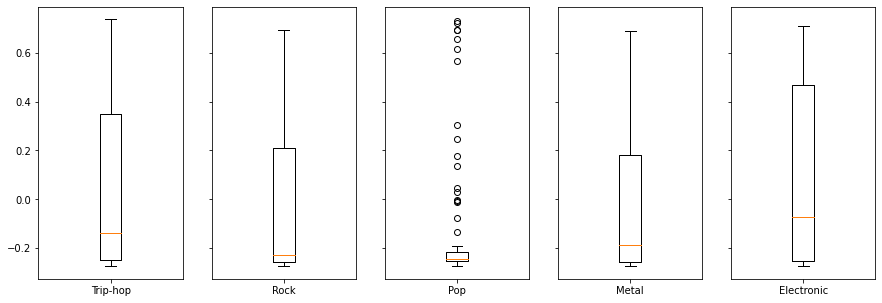

In [26]:
labels=['Trip-hop', 'Rock', 'Pop', 'Metal', 'Electronic']
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), sharey=True)
ax[0].boxplot(sample_df[sample_df['genre']=='Trip-Hop']['prop'], labels=['Trip-hop'])
ax[1].boxplot(sample_df[sample_df['genre']=='Rock']['prop'], labels=['Rock'])
ax[2].boxplot(sample_df[sample_df['genre']=='Pop']['prop'], labels=['Pop'])
ax[3].boxplot(sample_df[sample_df['genre']=='Metal']['prop'], labels=['Metal'])
ax[4].boxplot(sample_df[sample_df['genre']=='Electronic']['prop'], labels=['Electronic'])

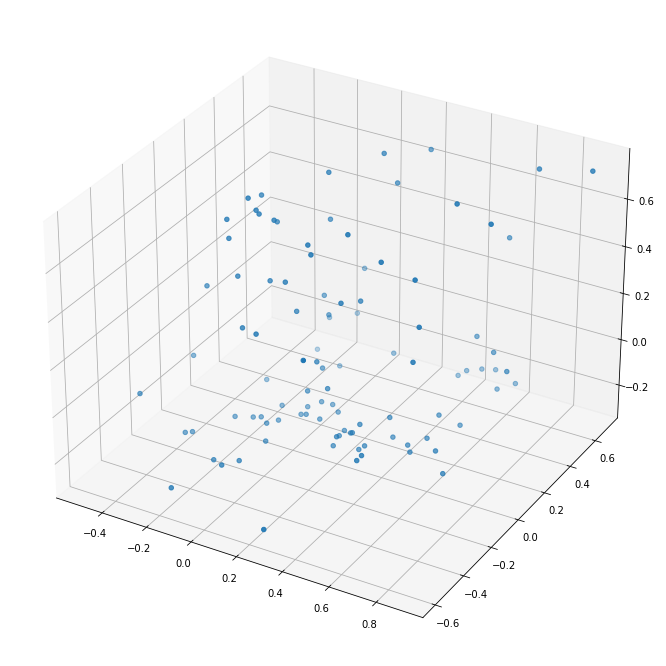

In [27]:
color_labels = sample_df['genre'].unique()
rgb_values = sns.color_palette("Set2", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sample_df[sample_df['genre']=='Trip-Hop'].loc[:,'mood'],sample_df[sample_df['genre']=='Trip-Hop'].loc[:,'context'],sample_df[sample_df['genre']=='Trip-Hop'].loc[:,'prop'], marker='o')

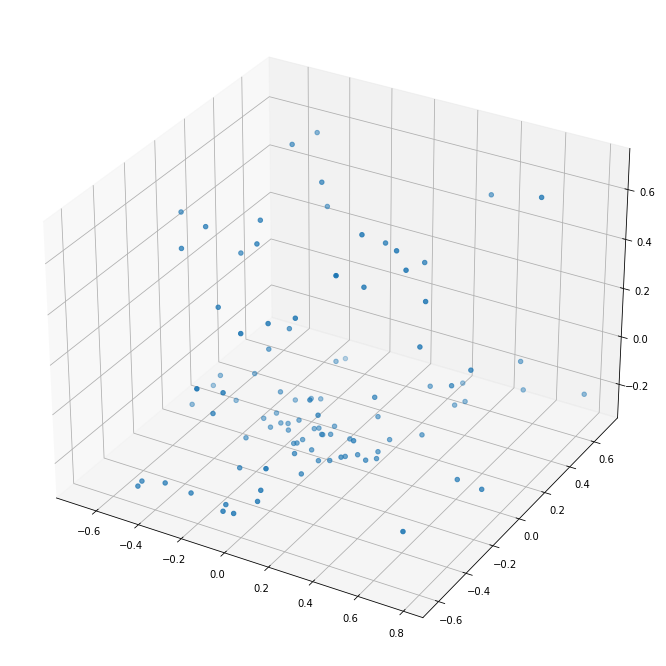

In [28]:
color_labels = df['genre'].unique()
rgb_values = sns.color_palette("Set2", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sample_df[sample_df['genre']=='Rock'].loc[:,'mood'],sample_df[sample_df['genre']=='Rock'].loc[:,'context'],sample_df[sample_df['genre']=='Rock'].loc[:,'prop'], marker='o')

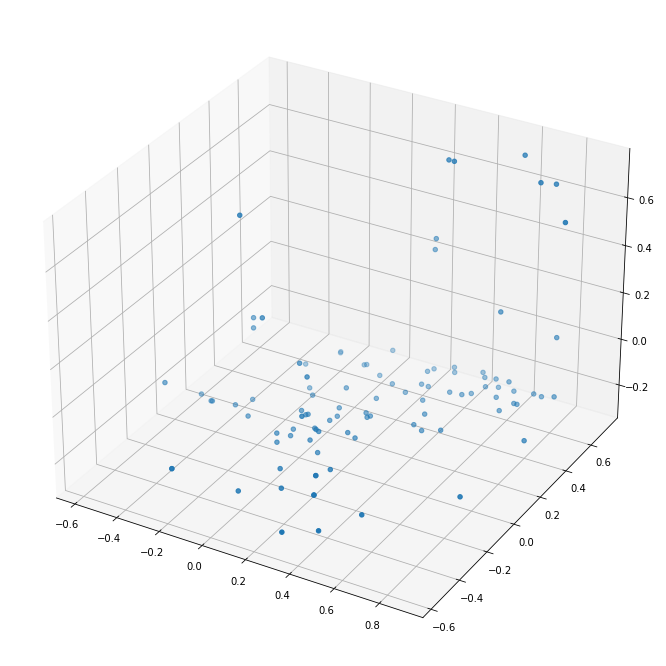

In [29]:
color_labels = df['genre'].unique()
rgb_values = sns.color_palette("Set2", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sample_df[sample_df['genre']=='Pop'].loc[:,'mood'],sample_df[sample_df['genre']=='Pop'].loc[:,'context'],sample_df[sample_df['genre']=='Pop'].loc[:,'prop'], marker='o')

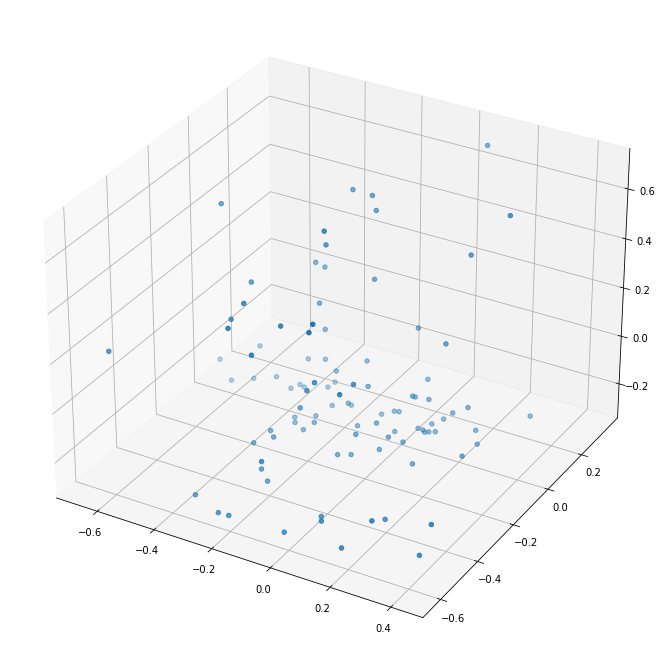

In [30]:
color_labels = df['genre'].unique()
rgb_values = sns.color_palette("Set2", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sample_df[sample_df['genre']=='Metal'].loc[:,'mood'],sample_df[sample_df['genre']=='Metal'].loc[:,'context'],sample_df[sample_df['genre']=='Metal'].loc[:,'prop'], marker='o')

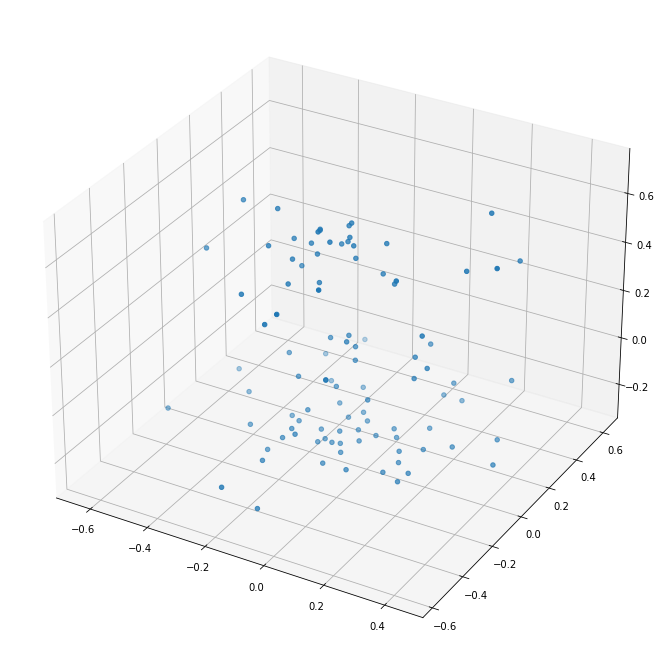

In [31]:
color_labels = df['genre'].unique()
rgb_values = sns.color_palette("Set2", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sample_df[sample_df['genre']=='Electronic'].loc[:,'mood'],sample_df[sample_df['genre']=='Electronic'].loc[:,'context'],sample_df[sample_df['genre']=='Electronic'].loc[:,'prop'], marker='o')

# PreProcessing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = sample_df.iloc[:,-3:]
X

,mood,prop,context
1800,-0.115158,0.339412,0.029658
1678,-0.218071,0.363360,-0.033105
3720,0.545026,0.329593,0.020006
1646,0.597537,-0.012902,0.491257
1750,0.142605,-0.047822,0.024855
...,...,...,...
1551,-0.080345,-0.264751,0.098769
4014,-0.100764,-0.227624,0.013240
2963,-0.289254,-0.253543,0.053183
3083,0.345811,0.463059,0.330647


In [34]:
# genre
y = sample_df.loc[:,'genre']
y

1800      Trip-Hop
1678      Trip-Hop
3720      Trip-Hop
1646      Trip-Hop
1750      Trip-Hop
           ...    
1551    Electronic
4014    Electronic
2963    Electronic
3083    Electronic
3965    Electronic
Name: genre, Length: 500, dtype: object

In [35]:
# artist_name
y2 = sample_df.loc[:,'artist_label']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)
X_train, X_test, y_train2, y_test2 = train_test_split(X, y2, random_state=42, test_size=0.4)

# Decision Tree and LinearSVC Classifier using genre as target - balanced dataset

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [38]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='random')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [39]:
clf.score(X_test, y_test)

0.245

In [40]:
confusion_matrix(y_test, y_pred)

array([[ 6, 10,  4, 11, 11],
       [ 8, 10,  2, 14,  5],
       [ 1,  3, 14,  8,  5],
       [ 8,  6,  8,  7,  9],
       [ 9,  6, 13, 10, 12]], dtype=int64)

#### Cross Validation with OneVsRestClassifier - DecisionTree and SVM

In [41]:
cross_val_score(OneVsRestClassifier(clf),
                X_train,
                y_train,
                cv=10)

array([0.3       , 0.2       , 0.33333333, 0.26666667, 0.2       ,
       0.3       , 0.16666667, 0.26666667, 0.3       , 0.33333333])

In [42]:
cross_val_score(OneVsRestClassifier(LinearSVC()),
                X_train,
                y_train,
                cv=10)

array([0.36666667, 0.43333333, 0.36666667, 0.23333333, 0.36666667,
       0.4       , 0.4       , 0.3       , 0.4       , 0.33333333])

## y = Artist Label

In [43]:
# Balance level
y_test2.shape, y_test2.sum()

((200,), 2)

In [44]:
clf2 = DecisionTreeClassifier(criterion='entropy', splitter='random')
clf2.fit(X_train, y_train2)
y_pred2 = clf2.predict(X_test)

In [45]:
clf.score(X_test, y_test2)

0.0

In [46]:
confusion_matrix(y_test2, y_pred2)

array([[193,   5],
       [  2,   0]], dtype=int64)

#### Cross Validation with OneVsRestClassifier - DecisionTree and SVM

In [47]:
cross_val_score(OneVsRestClassifier(clf),
                X_test,
                y_test2,
                cv=10,
                scoring='f1_macro')

C:\Users\gokay\Documents\GitHub\Spotify-Recommender\recommender\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.48717949, 0.48717949])

In [48]:
cross_val_score(OneVsRestClassifier(LinearSVC()),
                X_test,
                y_test2,
                cv=10)

C:\Users\gokay\Documents\GitHub\Spotify-Recommender\recommender\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 0.95])

#### OneVsRestClassifier with Decision Tree

In [49]:
OVRmodel = OneVsRestClassifier(clf)

In [50]:
OVRmodel.fit(X_train, y_train2)

OneVsRestClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                     splitter='random'))

In [51]:
OVR_y_pred = OVRmodel.predict(X_test)

In [52]:
confusion_matrix(y_test2, OVR_y_pred)

array([[198,   0],
       [  2,   0]], dtype=int64)

# NearestNeighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)

In [55]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
pred = knn.predict(X_test)

In [57]:
cross_val_score(knn,
               X_train,
               y_train,
               cv=10)

array([0.33333333, 0.43333333, 0.26666667, 0.26666667, 0.26666667,
       0.43333333, 0.3       , 0.3       , 0.43333333, 0.26666667])

In [59]:
confusion_matrix(y_test, pred)

array([[18,  7,  9,  5,  3],
       [10, 20,  2,  7,  0],
       [ 4,  5, 18,  3,  1],
       [11, 13,  5,  4,  5],
       [16,  7, 14,  5,  8]], dtype=int64)

# Predicting the artist name in dataset

In [60]:
df[df['artist_name']=='Portishead'].sample(10)

,id,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name,genre,artist_label,mood,prop,context
21,59zl7kjvcIAgybjBfOBPM4,Roads - Live,0.319749,0.452989,0.774579,0.042560,0.738956,0.000000,0.961924,0.0875,1.40818,Portishead,Trip-Hop,1,0.053604,-0.253363,-0.098360
38,7h14W1uQK7sjpVI1oVTobt,Wandering Star,0.667712,0.369987,0.732427,0.075234,0.506024,0.587588,0.117234,0.7070,0.80152,Portishead,Trip-Hop,1,0.399722,0.334432,0.358932
22,2Q33gu9J31oKIn3prU7xSu,Strangers - Live,0.230930,0.767995,0.892795,0.055047,0.008031,0.000063,0.953908,0.4030,0.83814,Portishead,Trip-Hop,1,0.258803,-0.266579,-0.592154
15,4WtmECNXQ6ljgndsR8vKqU,Mysterons - Live,0.431557,0.659993,0.848209,0.081998,0.414658,0.000014,0.732465,0.3040,1.64102,Portishead,Trip-Hop,1,-0.305873,-0.262317,-0.152566
14,72QLUv5gT0QiR4LUWza9vF,All Mine - Live,0.618600,0.519990,0.902873,0.031738,0.090260,0.000040,0.704409,0.3100,0.62238,Portishead,Trip-Hop,1,0.579284,-0.267198,-0.353840
1,5Pd4E39NFVp4GXzMB4yNU2,Hunter,0.552769,0.414988,0.767785,0.038502,0.885542,0.068669,0.088076,0.1470,1.34235,Portishead,Trip-Hop,1,0.104007,-0.184291,0.639645
12,0Xmg11Mt2C4V9J6PWw203q,Humming - Live,0.390805,0.606992,0.810701,0.051821,0.562249,0.063964,0.667335,0.0570,0.74131,Portishead,Trip-Hop,1,0.515586,-0.193980,-0.004140
25,25G1w3E4OMrovtPE5F510g,Undenied,0.251829,0.280985,0.793489,0.043288,0.451807,0.000007,0.093888,0.0321,2.22605,Portishead,Trip-Hop,1,-0.495829,-0.255452,0.338911
0,3KzBEj5pHEuyWXJEPvxE4g,Silence,0.550679,0.822996,0.829582,0.075754,0.188754,0.115115,0.253507,0.1230,1.27806,Portishead,Trip-Hop,1,-0.050899,-0.145757,0.042591
4,1aoeuWWsdUU8PAOsh6GCyL,Plastic,0.507837,0.556991,0.808662,0.088345,0.728915,0.041241,0.088577,0.0752,0.79964,Portishead,Trip-Hop,1,0.487009,-0.217140,0.532212


In [61]:
df[df['artist_name'] != 'Portishead'].sample(10)

,id,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name,genre,artist_label,mood,prop,context
1895,4mRSbPLnOm54ttkTYvxxSY,Decks Dark,0.582027,0.500990,0.734013,0.027992,0.668674,0.837838,0.117234,0.271,1.39149,Radiohead,Rock,0,-0.016420,0.583969,0.470116
5323,2BxvzKb6I2XJ0l3nDoCqeD,Foot Stompin'/I Wish I Could Shimmy Like My Si...,0.421108,0.705994,0.716688,0.062955,0.180722,0.001071,0.787575,0.649,1.24739,David Bowie,Rock,0,-0.111839,-0.246380,-0.352704
4634,5G8EwlJFjzGDUwFDqXjceU,Driving South - BBC Sessions,0.287356,0.870997,0.884246,0.050780,0.042168,0.892893,0.161323,0.921,1.83868,Jimi Hendrix,Rock,0,-0.747299,0.621648,0.009671
4551,3ROmNsNVaEE9ok6fkDAcQv,"Fire - Live 10/11/68 Winterland, San Francisco...",0.321839,0.872997,0.744091,0.084807,0.000388,0.001592,0.611222,0.671,1.63359,Jimi Hendrix,Rock,0,-0.513275,-0.249359,-0.347260
2065,7obvmD1HzGaYGIURbzhvaE,Palo Alto,0.432602,0.621992,0.723312,0.058481,0.008292,0.001842,0.248497,0.371,1.16970,Radiohead,Rock,0,0.073372,-0.246244,-0.077112
3806,55ydEfdcQpRKCsQCuECL2b,Everything About You Is New,0.109718,0.019880,0.448096,0.047138,0.981928,0.978979,0.111222,0.039,0.67726,Massive Attack,Trip-Hop,0,0.885743,0.755249,0.688638
2747,3Wwch6lLcgDh9IC5Vm1QiF,Pilate,0.562173,0.698994,0.832215,0.031530,0.005923,0.000051,0.124248,0.228,1.02925,Pearl Jam,Rock,0,0.183593,-0.259409,0.011954
1697,7bb6FlZVJizYuNbIrCOCwV,Bonnie & Clyde,0.842215,0.712994,0.806766,0.046618,0.471887,0.078378,0.093287,0.706,1.11826,Tricky,Trip-Hop,0,-0.037787,-0.179109,0.353076
2652,64MwuXv0kokoVgAj8ACte5,Last Exit - Live,0.400209,0.972999,0.895655,0.140479,0.013955,0.229229,0.362725,0.636,1.46265,Pearl Jam,Rock,0,-0.420166,-0.041058,-0.156614
4409,2lQOAwwFylugYgMvhvINUz,"Sorrow - Live at Knebworth 1990, 2021 Edit",0.368861,0.675993,0.726398,0.046930,0.143573,0.466466,0.689379,0.172,0.94936,Pink Floyd,Rock,0,0.280195,0.215363,-0.306426


<AxesSubplot:>

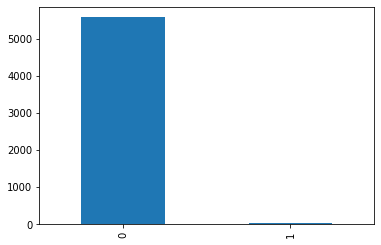

In [62]:
df['artist_label'].value_counts().plot(kind='bar')

In [63]:
X = df[['mood', 'prop', 'context']]
y = df['artist_label']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=61, test_size=0.4)

In [65]:
knn = KNeighborsClassifier(n_neighbors=2)

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [67]:
pred = knn.predict(X_test)

In [68]:
cross_val_score(knn,
               X_train,
               y_train,
               cv=10)

array([0.98813056, 0.99109792, 0.99109792, 0.99109792, 0.99109792,
       0.99109792, 0.99109792, 0.99109792, 0.99109792, 0.99109792])

In [69]:
confusion_matrix(y_test, pred)

array([[2231,    0],
       [  16,    0]], dtype=int64)

# KMeans for understanding the patterns

In [70]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [82]:
X = df.iloc[:,-3:]

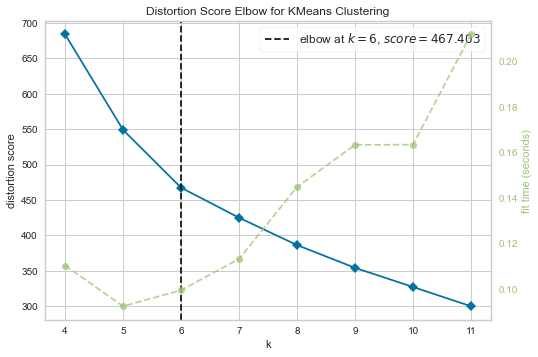

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(X)
visualizer.show()

In [84]:
model = KMeans(n_clusters=6, random_state=0)
y_pred = model.fit_predict(X)

In [87]:
df_kmeans = df.copy()
df_kmeans['kmeans_pred'] = y_pred

In [88]:
df_kmeans[df_kmeans['kmeans_pred']==3].sample(20)

,id,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name,genre,artist_label,mood,prop,context,kmeans_pred
2131,16oYDr36UvhC3hzGO5dIEF,"The Warmth - Live at HQ, Los Angeles, CA - Jun...",0.313480,0.808996,0.830318,0.087513,0.003804,0.000528,0.949900,0.3010,1.48767,Incubus,Rock,0,-0.257083,-0.259961,-0.592118,3
4229,3xGJuHvSxFJxxYlHj5BIoT,Young Lust,0.642633,0.549991,0.648209,0.036316,0.054818,0.191191,0.748497,0.5490,0.95485,Pink Floyd,Rock,0,0.228014,-0.049340,-0.410246,3
803,3aQVpmp3KO4e8psCYUuG5E,Fairies Wear Boots - Live,0.318704,0.933999,0.891748,0.085536,0.000031,0.422422,0.641283,0.3520,1.43311,Black Sabbath,Metal,0,-0.293297,0.152556,-0.369444,3
4945,3zGkIhMPGfyU6t41ThbvU1,Over the Top - Live at Hammersmith,0.305120,0.996000,0.920226,0.186264,0.002439,0.286286,0.751503,0.0389,1.11708,Motörhead,Metal,0,0.017506,0.011927,-0.448246,3
3655,4WyKUZdpgCwUdX9RhNi1V2,Ringfinger,0.770115,0.812996,0.690474,0.080645,0.003533,0.237237,0.573146,0.6140,1.13065,Nine Inch Nails,Rock,0,-0.072179,-0.009211,-0.317319,3
1520,2Lg2PtGdXUKcr6jbzntASS,Salva Mea - Live At Alexandra Palace,0.442006,0.961999,0.845832,0.119667,0.001133,0.000380,0.732465,0.0573,1.26998,Faithless,Electronic,0,-0.095895,-0.262522,-0.435243,3
2943,6hr68nyeoBw60eu1W5VGUZ,Introduction - Live,0.204807,0.951999,0.868450,0.131113,0.101405,0.126126,0.961924,0.0654,1.14272,Groove Armada,Electronic,0,0.014709,-0.140311,-0.534176,3
2659,3u4Pze42QsMVHVZuhrA7FR,Inside Job - Live,0.278997,0.633993,0.809936,0.040062,0.156626,0.016717,0.913828,0.1430,1.17811,Pearl Jam,Rock,0,0.128815,-0.240586,-0.461324,3
5324,0YzgVLQLch5DkhaKjFEkla,Diamond Dogs / It's Only Rock 'N' Roll (But I ...,0.382445,0.801996,0.718783,0.074610,0.212851,0.459459,0.889780,0.6370,1.35831,David Bowie,Rock,0,-0.246810,0.208627,-0.405338,3
3566,7Dwm8G3DGlZigEt2jOe8bZ,Suck,0.589342,0.884998,0.907686,0.051925,0.003262,0.268268,0.960922,0.2900,0.90792,Nine Inch Nails,Rock,0,0.165448,-0.001637,-0.600533,3


<AxesSubplot:ylabel='genre,kmeans_pred'>

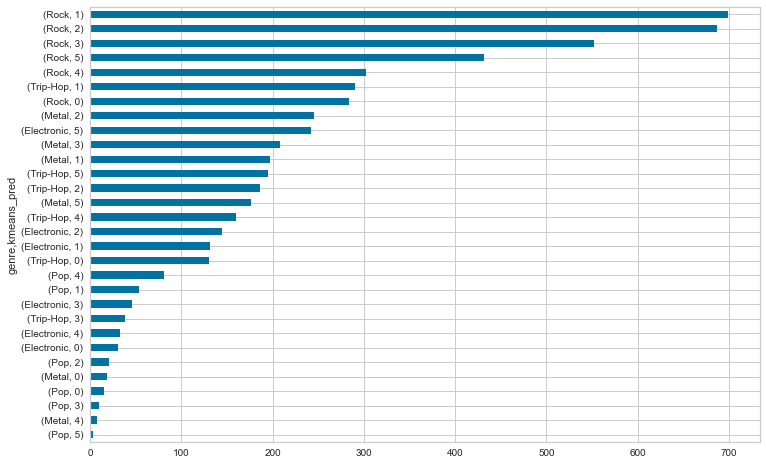

In [89]:
df_kmeans.groupby(['genre'])['kmeans_pred'].value_counts().sort_values().plot(kind='barh', figsize = (12,8))

# AgglomerativeClustering

In [90]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [92]:
model2 = AgglomerativeClustering(n_clusters= 5)
df_kmeans['Agg_Clus_pred'] = model2.fit_predict(X)

In [93]:
df_kmeans.head()

,id,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name,genre,artist_label,mood,prop,context,kmeans_pred,Agg_Clus_pred
0,3KzBEj5pHEuyWXJEPvxE4g,Silence,0.550679,0.822996,0.829582,0.075754,0.188754,0.115115,0.253507,0.1230,1.27806,Portishead,Trip-Hop,1,-0.050899,-0.145757,0.042591,1,2
1,5Pd4E39NFVp4GXzMB4yNU2,Hunter,0.552769,0.414988,0.767785,0.038502,0.885542,0.068669,0.088076,0.1470,1.34235,Portishead,Trip-Hop,1,0.104007,-0.184291,0.639645,4,0
2,1XiVySbnoOQaMoppyPdaUc,Nylon Smile,0.711599,0.667993,0.757481,0.093444,0.870482,0.382382,0.143287,0.3700,1.27970,Portishead,Trip-Hop,1,-0.045193,0.127365,0.589053,4,3
3,4kOy7M6eT5kYJCZxh0c6Lh,The Rip,0.436782,0.485990,0.773815,0.033091,0.932731,0.461461,0.098998,0.2490,0.74924,Portishead,Trip-Hop,1,0.516777,0.205478,0.663930,4,3
4,1aoeuWWsdUU8PAOsh6GCyL,Plastic,0.507837,0.556991,0.808662,0.088345,0.728915,0.041241,0.088577,0.0752,0.79964,Portishead,Trip-Hop,1,0.487009,-0.217140,0.532212,4,0


In [94]:
df_kmeans['Agg_Clus_pred'].value_counts()

0    1498
1    1452
2    1343
4     791
3     533
Name: Agg_Clus_pred, dtype: int64

In [95]:
df_kmeans["kmeans_pred"].value_counts()

1    1371
2    1283
5    1048
3     854
4     583
0     478
Name: kmeans_pred, dtype: int64

<AxesSubplot:ylabel='artist_name,Agg_Clus_pred'>

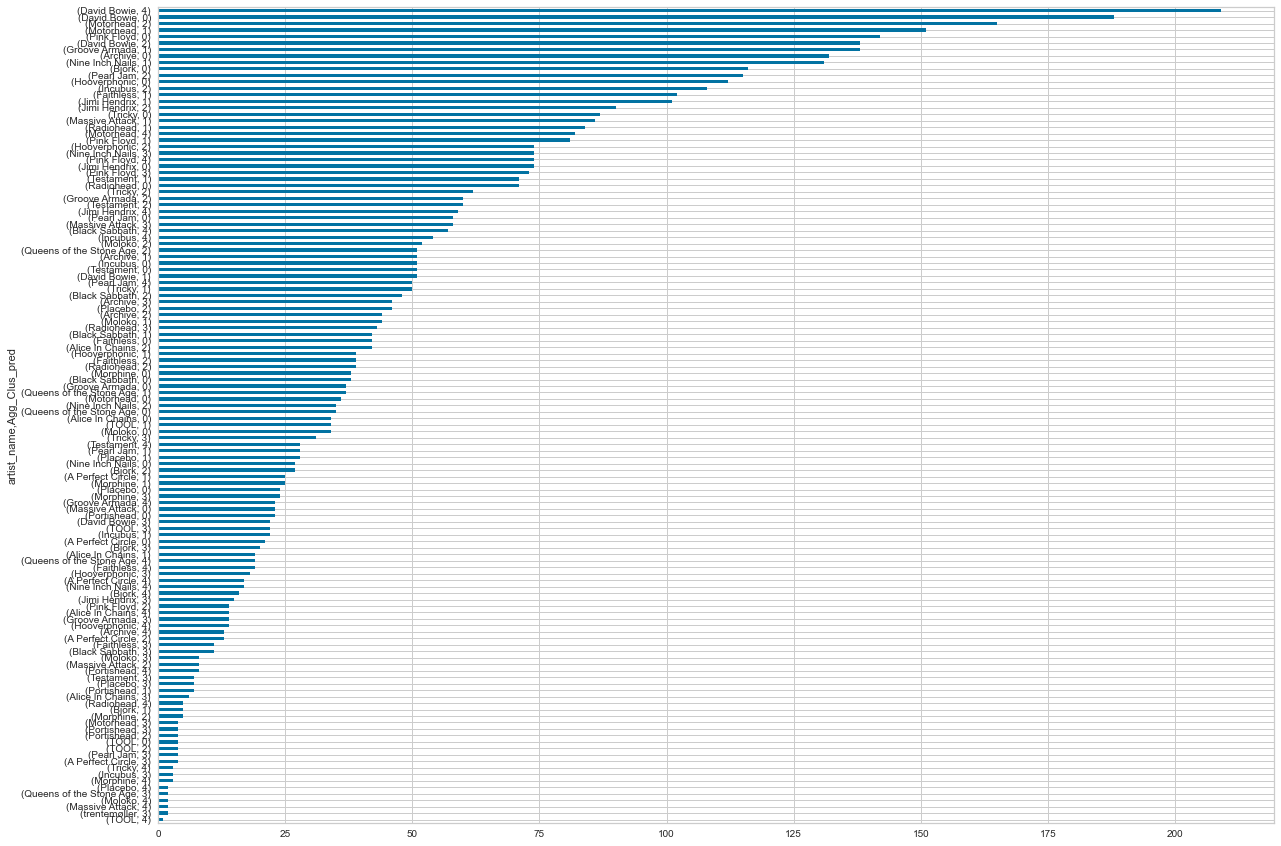

In [96]:
df_kmeans.groupby(['artist_name'])['Agg_Clus_pred'].value_counts().sort_values().plot(kind='barh', figsize = (20,15))

<AxesSubplot:ylabel='artist_name,Agg_Clus_pred'>

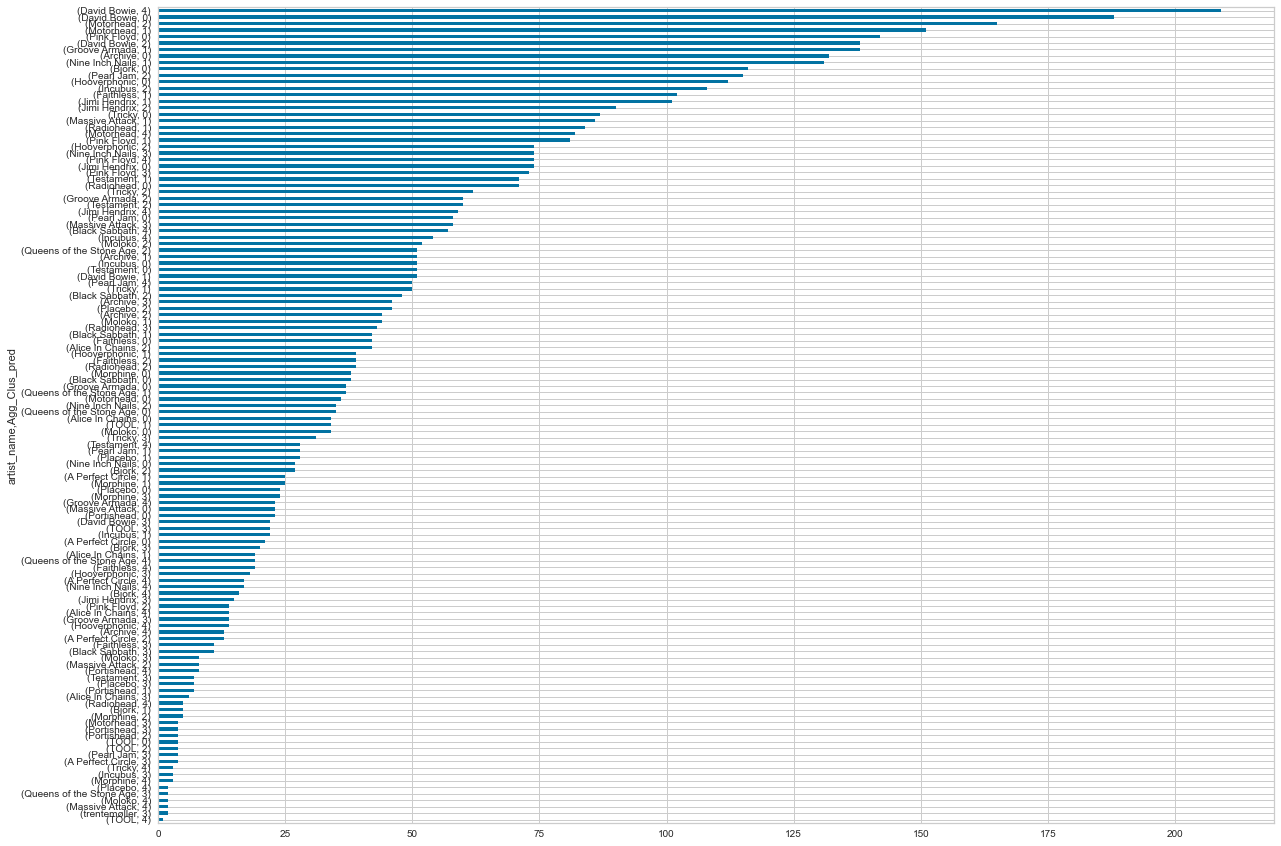

In [97]:
df_kmeans.groupby(['artist_name'])['Agg_Clus_pred'].value_counts().sort_values().plot(kind='barh', figsize = (20,15))

# Using Original Features in dataset with KMeans

In [109]:
X = df_kmeans.iloc[:,2:11]

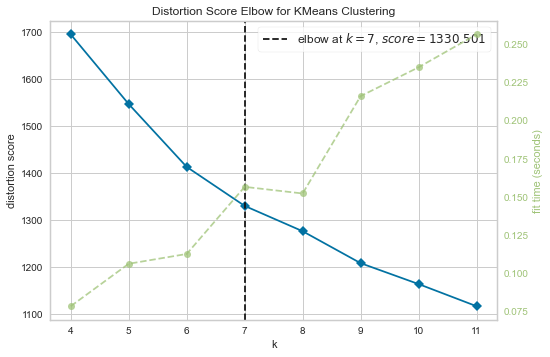

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [110]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(X)
visualizer.show()

In [112]:
model2 = KMeans(n_clusters=7, random_state=0)
y_pred2 = model2.fit_predict(X)

In [113]:
df_kmeans['pred_2'] = y_pred2

<AxesSubplot:xlabel='pred_2'>

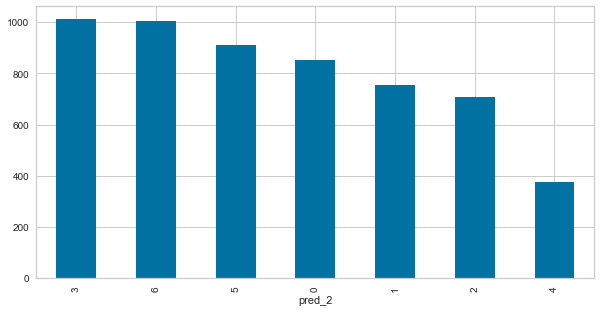

In [129]:
df_kmeans.groupby(['pred_2']).size().sort_values(ascending=False).plot(kind='bar', figsize = (10,5))